In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata. head ()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results. head ()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
mergedf= pd.merge(mouse_metadata, study_results,
                                 how="inner", on="Mouse ID")
mergedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
totalmice=len(mergedf["Mouse ID"].unique () )
totalmice
#249 individual mice used for the study 

249

In [8]:
#locate duplicate data by Mouse ID and Timepoint 
duplicate = mergedf.loc[mergedf.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicate # g989 

array(['g989'], dtype=object)

In [9]:
# Get all the data for the duplicate mouse ID. 
g989info= mergedf.loc[(mergedf["Mouse ID"] == "g989")]
g989info


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
#This is my initial code to remove the duplicate, but upon seeing that g989 has different tumor volumes for duplicate rows, 
#I think it's best to drop g989 completely from the dataset.
#cleanmerge= mergedf.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
#cleantotalmice=len(cleanmerge["Mouse ID"].unique () )
#cleantotalmice
#cleanmerge
#If I keep g989 in the dataset I have no way of knowing which Tumor Volume value is correct for the duplicate Timepoint row, 
#it could completely skew the data if I keep it in. 

In [11]:
cleandf= mergedf.drop(mergedf.index[mergedf['Mouse ID'] == 'g989'])
cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
cleantotalmice=len(cleandf["Mouse ID"].unique () )
cleantotalmice

248

In [13]:
cleandf.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


## Summary Statistics

In [14]:
#https://docs.scipy.org/doc/scipy/reference/stats.html
#group by drug type and get values based on Tumor Volume and place into a new df 

mean= cleandf.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median= cleandf.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance= cleandf.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev= cleandf.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem= cleandf.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [15]:
drugdf= pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                        "Standard Deviation": stdev,"Standard Error of Mean": sem})
drugdf

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
#produce same results using aggregate function- single line of code 
#https://sparkbyexamples.com/pandas/pandas-aggregate-functions-with-examples/
#.agg(new_col_name=('col_name', 'agg_func')--> tried to rename, didn't work, gives same data, different headings. 
#Not fond of this method as it renames the column to the function, renaming it is possible but not in one line of code

drugaggdf = cleandf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drugaggdf

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Times Tested by Drug'}, xlabel='Drug Type', ylabel=' No. Times Tested'>

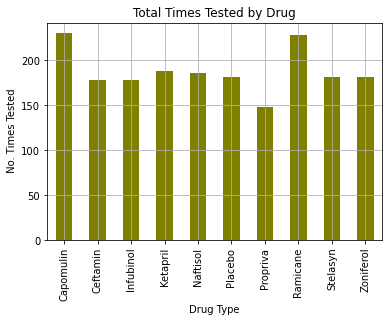

In [17]:
#Need to group data again by drug type and then get the total number of times that drug has been tested.
ttdrug= (cleandf.groupby(["Drug Regimen"])["Timepoint"]).count ()
# ttdrug will be values to plot with bars, x axis by name, with y as timepoints. 

ttdrug.plot(kind="bar",xlabel= "Drug Type", ylabel=" No. Times Tested", title= "Total Times Tested by Drug",
            color="Olive",stacked= True, grid=True)


In [18]:
x= sorted(cleandf["Drug Regimen"].unique ()) #wasn't aplhabetical without sorted func
y=ttdrug.values

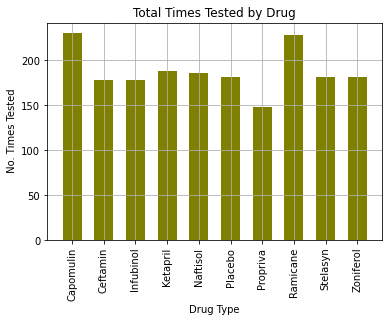

In [19]:
plt.bar (x,y, color="olive", width=.6)
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Drug Type")
plt.ylabel(" No. Times Tested")
plt.title("Total Times Tested by Drug")
plt.show ()

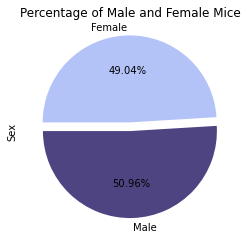

In [20]:
mvsf = cleandf["Sex"].value_counts() 
colors = ['#4F4482', '#B3C3F8']
mvsf.plot( kind="pie", autopct= "%1.2f%%", explode=(0,0.1), startangle=180, colors=colors, 
          title=("Percentage of Male and Female Mice"))

plt.show()


In [21]:
labels=cleandf["Sex"].unique ()
labels

array(['Male', 'Female'], dtype=object)

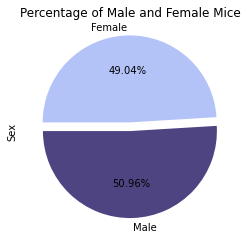

In [22]:
plt.pie(mvsf,labels= labels,startangle=180,colors=colors,autopct="%1.2f%%", explode=(0,0.1))      
plt.ylabel("Sex")
plt.title("Percentage of Male and Female Mice")
plt.show ()

## Quartiles, Outliers and Boxplots


In [23]:
treatreg = cleandf.groupby(["Mouse ID"]) ["Timepoint"].max ()

In [24]:
treatreg

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [25]:
merged2df=pd.merge(cleandf,treatreg,
                  how= "inner", on=("Mouse ID","Timepoint"))

In [26]:
merged2df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
circ=["Capomulin","Ramicane","Infubinol","Ceftamin"]

Capomulin=[]
Ramicane=[]
Infubinol=[]
Ceftamin=[]

for index, row in merged2df.iterrows():
        if row["Drug Regimen"] == circ[0]:
            Capomulin.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == circ[1]:
            Ramicane.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == circ[2]:
            Infubinol.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == circ[3]:
            Ceftamin.append(row["Tumor Volume (mm3)"])

In [28]:
circdf=pd.DataFrame({"Capomulin": Capomulin, "Ramicane": Ramicane, "Infubinol": Infubinol, 
                        "Ceftamin": Ceftamin})
circdf

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [29]:
#Finding the IQR, Upper Bound, Lower Bound ,
circ

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [32]:
# Create empty list to fill with tumor vol data (for plotting)
tumordata = []

for drug in circ:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    list1 = merged2df.loc[merged2df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset to tumor_vol_list 
    tumordata.append(list1)
    
    # Set up variables
    quartiles = list1.quantile([.25,.75])
    q1 = quartiles[.25]
    q3 = quartiles[.75]
    iqr = q3-q1  
    lower_fence= q1 - (1.5*iqr)
    upper_fence = q3 + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = list1.loc[(list1 < lower_fence) 
                  | (list1 > upper_fence)]
    print(f"outliers for {drug} is: {outliers.count()}")
    for x in outliers.index:
            print(f"Outlier tumor volume={outliers[x]}")
    

outliers for Capomulin is: 0
outliers for Ramicane is: 0
outliers for Infubinol is: 1
Outlier tumor volume=36.3213458
outliers for Ceftamin is: 0


In [33]:
#making outside to plot into df, quicker 
Q1 = circdf.quantile(0.25)
Q3 = circdf.quantile(0.75)
IQR= Q3-Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
lowcirc=circdf.min ()
highcirc=circdf.max ()

In [34]:
statsdf= pd.DataFrame({"Quartile 1": Q1, "Quartile 3": Q3, "IQR": IQR,"Upper Bound": upper, "Lower Bound": lower,
                       "Minimum": lowcirc, "Maximum": highcirc})
statsdf

,Quartile 1,Quartile 3,IQR,Upper Bound,Lower Bound,Minimum,Maximum
Capomulin,32.377357,40.159220,7.781863,51.832015,20.704562,23.343598,47.685963
Ramicane,31.560470,40.659006,9.098537,54.306811,17.912664,22.050126,45.220869
Infubinol,54.048608,65.525743,11.477135,82.741446,36.832905,36.321346,72.226731
Ceftamin,48.722078,64.299830,15.577752,87.666458,25.355450,45.000000,68.923185


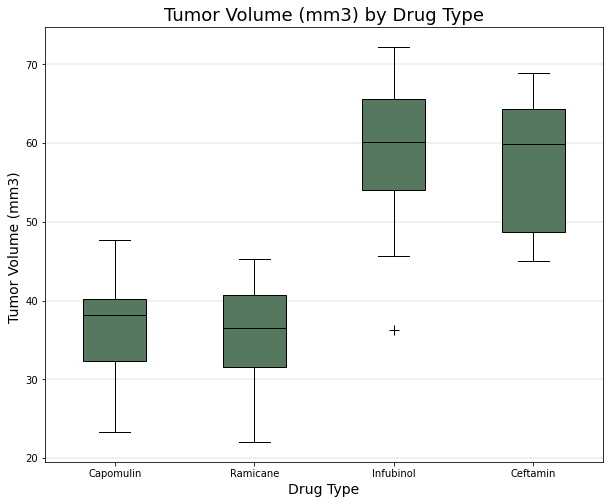

In [35]:
boxy = [circdf["Capomulin"],
                circdf["Ramicane"],
                circdf["Infubinol"],
                circdf["Ceftamin"]
               ]

bx,plot=plt.subplots (figsize=(10, 8))
flierprops = dict(marker='+', markerfacecolor='black', markersize=10,
                  linestyle='none')
c="#56785f"
c2="black"
plot.grid(color='black', axis='y', linestyle='-', linewidth=0.15, alpha=0.8)
plot.boxplot(boxy ,labels=circ,patch_artist=True, boxprops=dict(facecolor=c, color=c2),
            capprops=dict(color=c2),
            whiskerprops=dict(color=c2),
            flierprops=flierprops,
            medianprops=dict(color=c2),
            )
plt.xlabel("Drug Type",fontsize=14)
plt.ylabel("Tumor Volume (mm3) ",fontsize=14)
plt.title("Tumor Volume (mm3) by Drug Type",fontsize=18)
plt.show ()


## Line and Scatter Plots

In [36]:
#working out mean for later and using df to find a Mouse ID 
cdf=cleandf.loc[cleandf["Drug Regimen"] == "Capomulin"]
cdfID =cdf.groupby(['Mouse ID']).mean ()
cdfID

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin- just picked a random one. 
x401= cleandf.loc[cleandf["Mouse ID"] == "x401",]

x_x401 = x401["Timepoint"]
y_x401 = x401["Tumor Volume (mm3)"]



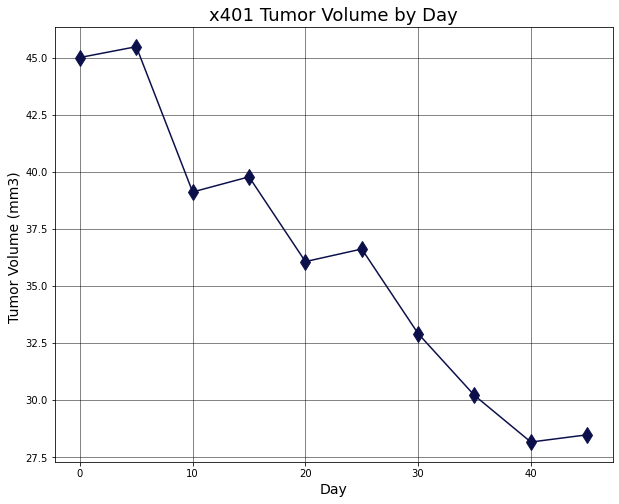

In [38]:
ln,plot=plt.subplots (figsize=(10, 8))
plt.plot(x_x401,y_x401, marker="d",markersize=12, color="#0c104a" )
plot.grid(color='black', alpha=.6)
plt.xlabel("Day",fontsize=14)
plt.ylabel("Tumor Volume (mm3) ",fontsize=14)
plt.title("x401 Tumor Volume by Day",fontsize=18)
plt.show ()

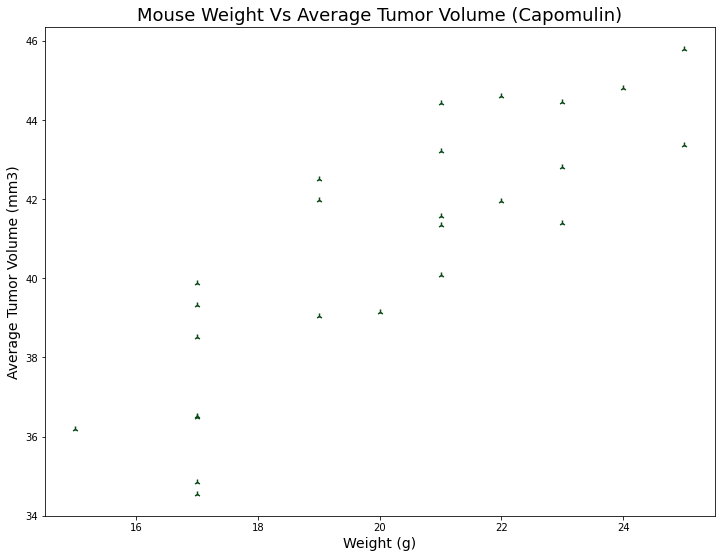

In [39]:
sc, ax1 = plt.subplots(figsize=(12, 9))
plt.scatter(cdfID['Weight (g)'],cdfID['Tumor Volume (mm3)'], marker="2" ,color="#0c4a19")
plt.title('Mouse Weight Vs Average Tumor Volume (Capomulin)', fontsize=18)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=14)
plt.show()

## Correlation and Regression

In [40]:
cor= st.pearsonr(cdfID['Weight (g)'],cdfID['Tumor Volume (mm3)'])
print(round(cor[0],7))

0.8419363


In [41]:
x= cdfID['Weight (g)']
y= cdfID['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, stderr = st.linregress(x,y)
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
rline = (x*slope) + intercept

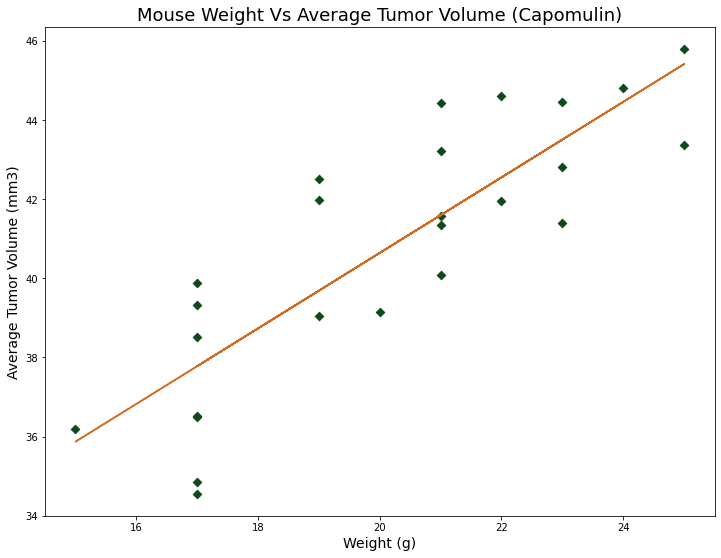

In [42]:
sc, ax1 = plt.subplots(figsize=(12, 9))
plt.scatter(cdfID['Weight (g)'],cdfID['Tumor Volume (mm3)'], marker="D" ,color="#0c4a19")
plt.plot(x, rline, color="#d16c24")
plt.title('Mouse Weight Vs Average Tumor Volume (Capomulin)', fontsize=18)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=14)
plt.show()

## Observations

In [43]:
obdf = cleandf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem", "min","max"])
obdf

,mean,median,var,std,sem,min,max
Drug Regimen,,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,23.343598,48.158209
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,45.000000,68.923185
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,36.321346,72.226731
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,45.000000,78.567014
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,45.000000,76.668817
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,45.000000,73.212939
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,45.000000,72.455421
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,22.050126,47.622816
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,45.000000,75.123690


### Written Work 
1.The only successful drug regimes tested within this study (that showed a strong positive decrease in Tumor Size) are Capomulin and Ramicane.If you look at the min/max and var columns, you will be able to see this very clearly.

2.Infubinol, whilst it may look as though it was successful due to it's low min value, is an outlying piece of data, the var displays a better representation of this. 

3.Capomulin and Ramicane also happen to be the highest tested frequency drug regimes.

4.There is a strong positive correlation between the weight of the Mouse and the Tumor Volume.

5.Mouse ID x401 on drug regime Capomulin showed significant Tumor Volume decrease over the period of 45 days, we do see a slight increase after day 15 and 25 however the overall decrease of tumor size is dramatic. See below for exact figures. 

In [44]:
x401

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0
